# Projet Numérique : Dynamique Quantique

## Résolution en états stationnaire 

Numba : a voir vers la fin
http://www.enit.rnu.tn/fr/Minds/quant/amphi6MQ.pdf pour explication sin et cos

In [261]:
import numpy as np
import matplotlib.pyplot as plt

N = 10
L = 5

dx = L/N

print("dx : ", dx)

## On initialise x tel que 

x = np.linspace(-L,L,N)

print("x : \n",x)

dx :  0.5
x : 
 [-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


V :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
V2 :  [12.5         7.5617284   3.85802469  1.38888889  0.15432099  0.15432099
  1.38888889  3.85802469  7.5617284  12.5       ]


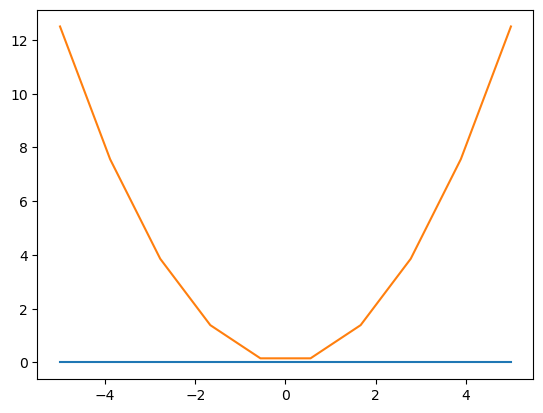

In [262]:
## On commence par former la liste de valeurs des vecteurs et V.

V = np.zeros(N) #potentiel nul
V2 = np.zeros(N) #potentiel harmonique

''' Pour un potentiel fini :
for i in range(x.size):
    if (x[i]<= -L/2) or (x[i]>=L/2):
        V[i] = 10

'''

omega = 1

for i in range(N):
    V2[i] = (omega*x[i])**2 / 2

print("V : ", V)
print("V2 : ", V2)

plt.plot(x,V)
plt.plot(x,V2)

plt.show()

In [263]:
## Ensuite, on forme les matrices d et e diagonales principale et supérieure (resp) de H

def get_matrice(V):

    d = np.zeros(N)
    e= np.zeros(N-1)

    for i in range(V.size):
        d[i] = 2/(dx**2) + V[i]

    for i in range(e.size):
        e[i] = -1/(dx**2)
        
    return d,e

d,e = get_matrice(V)

print("d : \n", d)
print("e : \n", e)

d : 
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
e : 
 [-4. -4. -4. -4. -4. -4. -4. -4. -4.]


In [264]:
from scipy.linalg import eigh_tridiagonal

## Puis, on calcule w et v respectivement les valeurs propres et vecteurs propres de H

w, v = eigh_tridiagonal(d,e)

print("w : \n", w)
print("v : \n", v)

w : 
 [ 0.32405621  1.26997174  2.76111413  4.6766799   6.86148129  9.13851871
 11.3233201  13.23888587 14.73002826 15.67594379]
v : 
 [[ 0.12013117 -0.23053002  0.3222527   0.38786839  0.42206128  0.42206128
   0.38786839 -0.3222527   0.23053002  0.12013117]
 [ 0.23053002 -0.38786839  0.42206128  0.3222527   0.12013117 -0.12013117
  -0.3222527   0.42206128 -0.38786839 -0.23053002]
 [ 0.3222527  -0.42206128  0.23053002 -0.12013117 -0.38786839 -0.38786839
  -0.12013117 -0.23053002  0.42206128  0.3222527 ]
 [ 0.38786839 -0.3222527  -0.12013117 -0.42206128 -0.23053002  0.23053002
   0.42206128 -0.12013117 -0.3222527  -0.38786839]
 [ 0.42206128 -0.12013117 -0.38786839 -0.23053002  0.3222527   0.3222527
  -0.23053002  0.38786839  0.12013117  0.42206128]
 [ 0.42206128  0.12013117 -0.38786839  0.23053002  0.3222527  -0.3222527
  -0.23053002 -0.38786839  0.12013117 -0.42206128]
 [ 0.38786839  0.3222527  -0.12013117  0.42206128 -0.23053002 -0.23053002
   0.42206128  0.12013117 -0.3222527   0.38

In [265]:
# On doit désormais normaliser les vecteurs propres :

def normalize(m, dx):
    m /= np.linalg.norm(m,axis=0)
    m /= np.sqrt(dx)
    return m

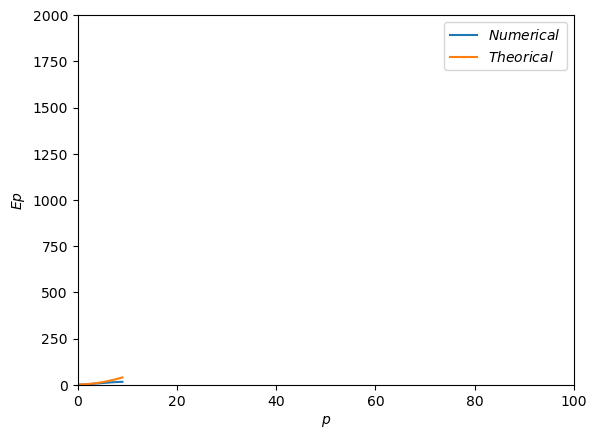

In [266]:
## On regarde la différence entre la courbe théorique et la courbe obtenu

p = np.arange(0,N,1)

Ep = np.zeros(N)
for i in range(N):
    Ep[i] = (np.pi*(i+1)/L)**2

plt.plot(p,w,label="$Numerical$")
plt.plot(p,Ep,label = "$Theorical$")
plt.xlabel('$p$')
plt.ylabel('$Ep$')
plt.xlim(0, 100)
plt.ylim(0, 2000)
plt.legend()
plt.savefig('document/energie_num_vs_theoric_n%.i.pdf' %N,format='pdf')
plt.savefig('document/energie_num_vs_theoric_n%.i' %N)
plt.show()

In [267]:
# On compare le théorique et le calculé pour psi

def psi_theo(p):
    psi_theo = np.zeros(N)
    for i in range(N):
        if (p%2 == 0): #fonction pair
            psi_theo[i] = np.sqrt(2/L)*np.cos(((p+1)*np.pi*x[i])/(L*2))
        else: #fonction impair
            psi_theo[i] = np.sqrt(2/L)*np.sin(((p+1)*np.pi*x[i])/(L*2))
    return psi_theo

def psi_num(v,p):
    psi_num = np.zeros(N)
    for i in range(N):
        psi_num[i] = v[i][p]
    return psi_num

def energie_pot(p):
    value_ep = np.zeros(N)
    for i in range(value_ep.size):
        value_ep[i] = Ep[p]
    return value_ep

In [268]:
# On crée la fonction pour former psi à partir de V (dans le cas où V n'est plus le même)

def get_psi(V):
    d,e = get_matrice(V)
    
    w, v = eigh_tridiagonal(d,e)
    
    for vec in v:
        normalize(v,dx)
    v0 = np.zeros((N,N))
    for i in range(N):
        for y in range(N):            #On échange ligne et colonnes
            v0[i][y] = v[y][i]
    
    return w,v0

# On crée la fonction pour afficher les graphiques

def get_graph(w,v,name,theorical_psy):
    for i in range(2):
        plt.plot(x,v[i]+w[i],label="Numérique $p=%i$" %i)
        plt.plot(x,theorical_psy(i)+w[i],label = "Théorique $p=%i$" %i)
        plt.plot(x,energie_pot(i),"--",label = "Ep pour $p=%i$" %i)
    plt.xlabel('$x$')
    plt.ylabel('$\Psi(x)$')
    plt.title('Norme de $\Psi(x)$ en fonction de la position x (pour $n=%i$)' %N)
    plt.legend()
    plt.savefig('document/psi_fonction_de_x_%s_n%i.pdf' %(name,N),format='pdf')
    plt.savefig('document/psi_fonction_de_x_%s_n%i' %(name,N))
    plt.show()

In [271]:
w,v = get_psi(V)

get_graph(w,v,"puit_infini",psi_theo)

NameError: name 'psy_theo' is not defined

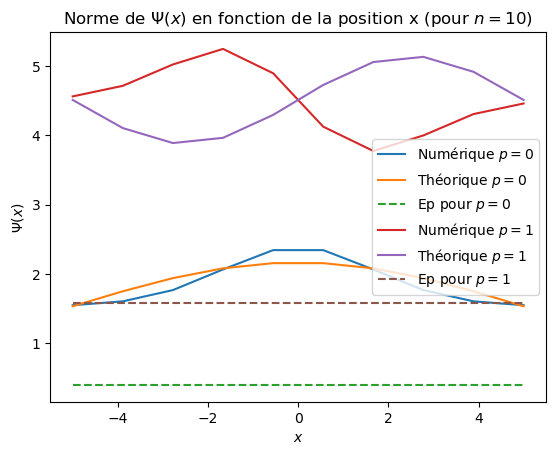

In [270]:
w,v = get_psi(V2)

get_graph(w,v,"harmonique")